In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df=pd.read_csv('preprocessed.csv')
df.head()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_3688\2737237252.py:1: DtypeWarning: Columns (0: invoice) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('preprocessed.csv')


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,basket_size,basket_type,invoice_value,product_type
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,8,medium_retail,83.4,frequent
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,8,medium_retail,81.0,frequent
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,8,medium_retail,81.0,frequent
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,8,medium_retail,100.8,frequent
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,8,medium_retail,30.0,frequent


In [3]:
df.columns

Index(['invoice', 'stockcode', 'description', 'quantity', 'invoicedate',
       'price', 'customer_id', 'country', 'basket_size', 'basket_type',
       'invoice_value', 'product_type'],
      dtype='str')

In [4]:
basket = (df.groupby(['invoice', 'description'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('invoice'))
basket.head()

description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [6]:
def encode_units(x):
    if x <= 0:
        return False
    if x >= 1:
        return True

In [7]:
basket_sets = basket.map(encode_units)

In [8]:
frequent_itemsets = fpgrowth(basket_sets, min_support=0.02, use_colnames=True)

In [9]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [10]:
rules = rules.sort_values('confidence', ascending=False)

In [11]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

                                      antecedents  \
42    frozenset({PINK REGENCY TEACUP AND SAUCER})   
45    frozenset({PINK REGENCY TEACUP AND SAUCER})   
41   frozenset({GREEN REGENCY TEACUP AND SAUCER})   
40  frozenset({ROSES REGENCY TEACUP AND SAUCER })   
19    frozenset({SWEETHEART CERAMIC TRINKET BOX})   
12  frozenset({RED HANGING HEART T-LIGHT HOLDER})   
49           frozenset({JUMBO BAG PINK POLKADOT})   
50        frozenset({ALARM CLOCK BAKELIKE GREEN})   
43   frozenset({GREEN REGENCY TEACUP AND SAUCER})   
38              frozenset({DOLLY GIRL LUNCH BOX})   

                                        consequents   support  confidence  \
42     frozenset({GREEN REGENCY TEACUP AND SAUCER})  0.021308    0.833984   
45    frozenset({ROSES REGENCY TEACUP AND SAUCER })  0.020060    0.785156   
41    frozenset({ROSES REGENCY TEACUP AND SAUCER })  0.025525    0.763433   
40     frozenset({GREEN REGENCY TEACUP AND SAUCER})  0.025525    0.725532   
19      frozenset({STRAWBERRY C

In [12]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
42,frozenset({PINK REGENCY TEACUP AND SAUCER}),frozenset({GREEN REGENCY TEACUP AND SAUCER}),0.025550,0.033434,0.021308,0.833984,24.944224,1.0,0.020454,5.822139,0.985079,0.565563,0.828242,0.735649
45,frozenset({PINK REGENCY TEACUP AND SAUCER}),frozenset({ROSES REGENCY TEACUP AND SAUCER }),0.025550,0.035181,0.020060,0.785156,22.317927,1.0,0.019162,4.490796,0.980238,0.493252,0.777322,0.677685
41,frozenset({GREEN REGENCY TEACUP AND SAUCER}),frozenset({ROSES REGENCY TEACUP AND SAUCER }),0.033434,0.035181,0.025525,0.763433,21.700443,1.0,0.024348,4.078417,0.986914,0.592357,0.754807,0.744482
40,frozenset({ROSES REGENCY TEACUP AND SAUCER }),frozenset({GREEN REGENCY TEACUP AND SAUCER}),0.035181,0.033434,0.025525,0.725532,21.700443,1.0,0.024348,3.521597,0.988701,0.592357,0.716038,0.744482
19,frozenset({SWEETHEART CERAMIC TRINKET BOX}),frozenset({STRAWBERRY CERAMIC TRINKET BOX}),0.036977,0.057636,0.026248,0.709852,12.316078,1.0,0.024117,3.247868,0.954084,0.383942,0.692106,0.582631


In [13]:
import numpy as np

# 1. Calculate Cosine Similarity (Null-Invariant)
# This measures the 'geometric' bond between two products
rules['cosine'] = rules['support'] / np.sqrt(rules['antecedent support'] * rules['consequent support'])

# 2. Calculate Kulczynski Measure (Null-Invariant)
# This is the average of Confidence(A->B) and Confidence(B->A)
# To avoid the join error, we can calculate it using Support and individual Supports:
# Formula: 0.5 * ( (P(A∩B)/P(A)) + (P(A∩B)/P(B)) )
rules['kulczynski'] = 0.5 * ( (rules['support'] / rules['antecedent support']) + 
                             (rules['support'] / rules['consequent support']) )

# 3. Calculate Imbalance Ratio (Bonus)
# Since you're a Store Manager, you want to know if the relationship is one-sided
# 0 means perfectly balanced; 1 means one product is way more popular than the other
rules['imbalance_ratio'] = (abs(rules['antecedent support'] - rules['consequent support'])) / \
                           (rules['antecedent support'] + rules['consequent support'] - rules['support'])

# Sort by Kulczynski to see the strongest null-invariant pairings
rules = rules.sort_values('kulczynski', ascending=False)

print(rules[['antecedents', 'consequents', 'support', 'kulczynski', 'cosine', 'imbalance_ratio']].head())

                                      antecedents  \
40  frozenset({ROSES REGENCY TEACUP AND SAUCER })   
41   frozenset({GREEN REGENCY TEACUP AND SAUCER})   
42    frozenset({PINK REGENCY TEACUP AND SAUCER})   
43   frozenset({GREEN REGENCY TEACUP AND SAUCER})   
45    frozenset({PINK REGENCY TEACUP AND SAUCER})   

                                      consequents   support  kulczynski  \
40   frozenset({GREEN REGENCY TEACUP AND SAUCER})  0.025525    0.744482   
41  frozenset({ROSES REGENCY TEACUP AND SAUCER })  0.025525    0.744482   
42   frozenset({GREEN REGENCY TEACUP AND SAUCER})  0.021308    0.735649   
43    frozenset({PINK REGENCY TEACUP AND SAUCER})  0.021308    0.735649   
45  frozenset({ROSES REGENCY TEACUP AND SAUCER })  0.020060    0.677685   

      cosine  imbalance_ratio  
40  0.744241         0.040533  
41  0.744241         0.040533  
42  0.729047         0.209272  
43  0.729047         0.209272  
45  0.669108         0.236810  


In [14]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,cosine,imbalance_ratio
40,frozenset({ROSES REGENCY TEACUP AND SAUCER }),frozenset({GREEN REGENCY TEACUP AND SAUCER}),0.035181,0.033434,0.025525,0.725532,21.700443,1.0,0.024348,3.521597,0.988701,0.592357,0.716038,0.744482,0.744241,0.040533
41,frozenset({GREEN REGENCY TEACUP AND SAUCER}),frozenset({ROSES REGENCY TEACUP AND SAUCER }),0.033434,0.035181,0.025525,0.763433,21.700443,1.0,0.024348,4.078417,0.986914,0.592357,0.754807,0.744482,0.744241,0.040533
42,frozenset({PINK REGENCY TEACUP AND SAUCER}),frozenset({GREEN REGENCY TEACUP AND SAUCER}),0.025550,0.033434,0.021308,0.833984,24.944224,1.0,0.020454,5.822139,0.985079,0.565563,0.828242,0.735649,0.729047,0.209272
43,frozenset({GREEN REGENCY TEACUP AND SAUCER}),frozenset({PINK REGENCY TEACUP AND SAUCER}),0.033434,0.025550,0.021308,0.637313,24.944224,1.0,0.020454,2.686756,0.993114,0.565563,0.627804,0.735649,0.729047,0.209272
45,frozenset({PINK REGENCY TEACUP AND SAUCER}),frozenset({ROSES REGENCY TEACUP AND SAUCER }),0.025550,0.035181,0.020060,0.785156,22.317927,1.0,0.019162,4.490796,0.980238,0.493252,0.777322,0.677685,0.669108,0.236810


In [15]:
#Ir should be low
#Kulc should be high and they have smae product family too
rules.shape

(52, 16)

In [16]:
!pip install networkx

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ----------------------------------- ---- 1.8/2.1 MB 17.4 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 15.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


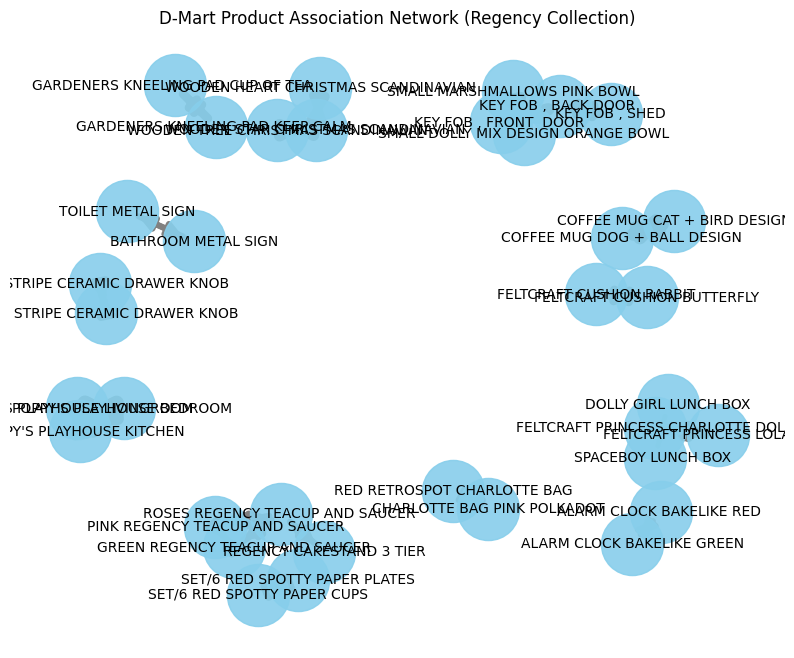

In [62]:
import networkx as nx
import matplotlib.pyplot as plt

# We filter for the strongest rules to keep the graph clean
strong_rules = rules[rules['kulczynski'] > 0.6].copy()

# Create a directed graph
G = nx.DiGraph()

for idx, row in strong_rules.iterrows():
    # Convert frozensets to strings for labeling
    ant = list(row['antecedents'])[0]
    con = list(row['consequents'])[0]
    
    # Add nodes and edges
    # We use 'lift' or 'kulczynski' to determine the thickness of the connection
    G.add_edge(ant, con, weight=row['lift'])

# Plotting the relationship map
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=1) 

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue', alpha=0.9)


edges = G.edges()
weights = [G[u][v]['weight'] / 5 for u, v in edges] # scaled for visibility
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray', arrowsize=20)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title("D-Mart Product Association Network (Regency Collection)")
plt.axis('off')
plt.show()

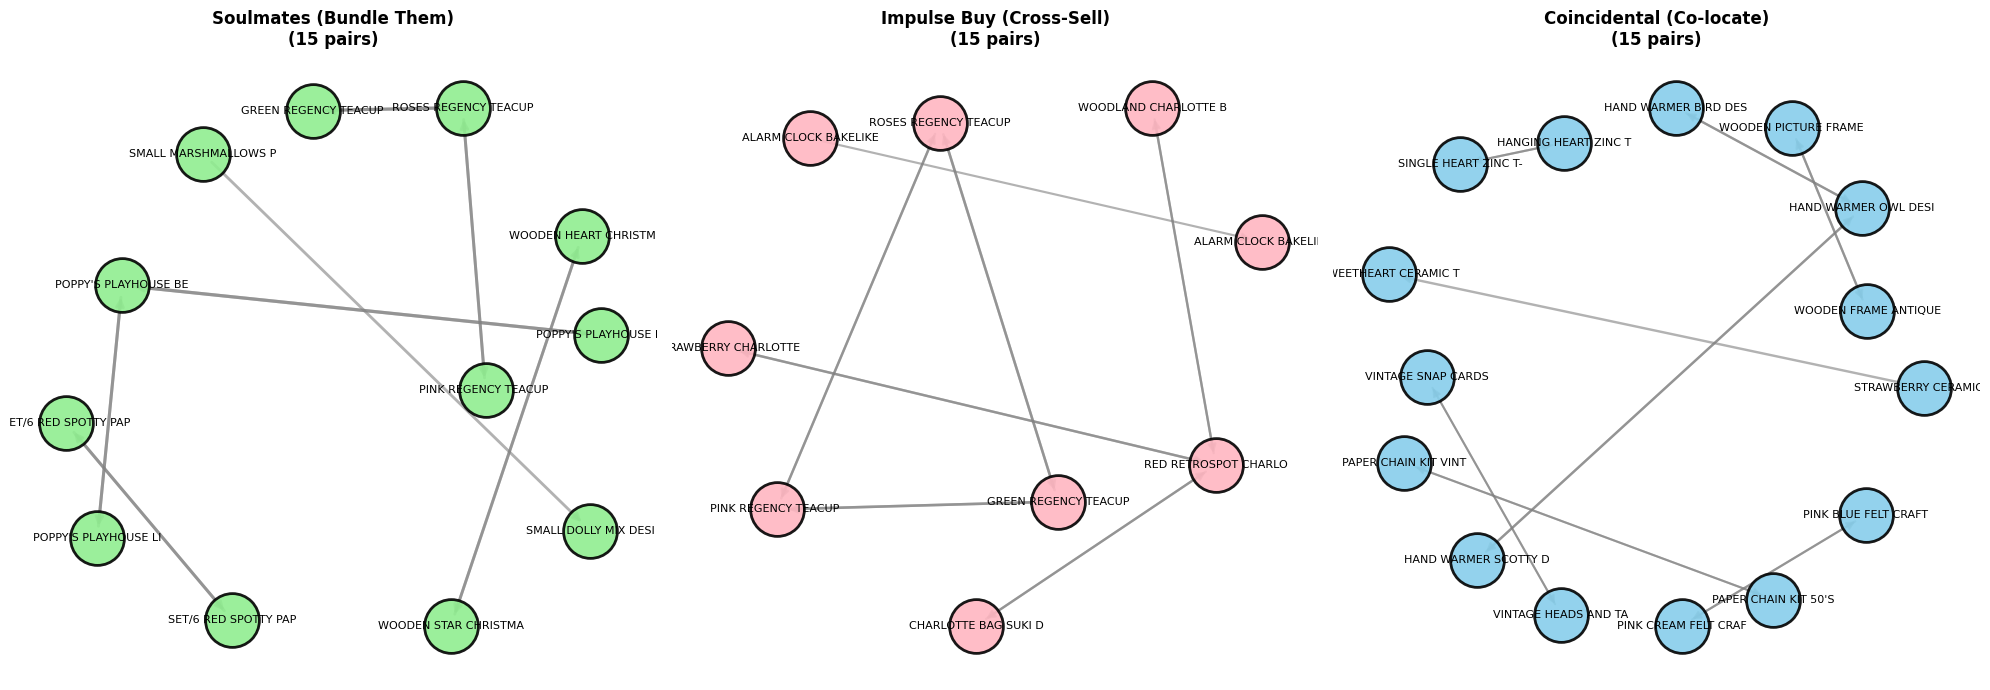

In [67]:
import matplotlib.pyplot as plt
import networkx as nx

# Create separate graphs for each strategy
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

strategies = ['Soulmates (Bundle Them)', 'Impulse Buy (Cross-Sell)', 'Coincidental (Co-locate)']
colors = ['#90EE90', '#FFB6C1', '#87CEEB']

for idx, (strategy, color) in enumerate(zip(strategies, colors)):
    ax = axes[idx]
    
    # Filter rules by strategy
    strategy_rules = rules[rules['strategy'] == strategy].nlargest(15, 'kulczynski')
    
    if len(strategy_rules) == 0:
        ax.text(0.5, 0.5, f'No {strategy} found', ha='center', va='center')
        ax.set_title(strategy, fontsize=12, fontweight='bold')
        ax.axis('off')
        continue
    
    # Create graph
    G = nx.DiGraph()
    for _, row in strategy_rules.iterrows():
        ant = list(row['antecedents'])[0]
        con = list(row['consequents'])[0]
        G.add_edge(ant, con, weight=row['kulczynski'])
    
    # Layout
    pos = nx.spring_layout(G, k=2, iterations=50)
    
    # Draw
    nx.draw_networkx_nodes(G, pos, node_size=1500, node_color=color, 
                          edgecolors='black', linewidths=2, ax=ax, alpha=0.9)
    
    edge_widths = [G[u][v]['weight'] * 3 for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='gray',
                          arrowsize=12, ax=ax, alpha=0.6)
    
    labels = {n: n[:20] for n in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=8, ax=ax)
    
    ax.set_title(f'{strategy}\n({len(strategy_rules)} pairs)', 
                fontsize=12, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [47]:

frequent_itemsets = fpgrowth(basket_sets, min_support=0.009, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

rules['kulczynski'] = 0.5 * ((rules['support'] / rules['antecedent support']) + 
                             (rules['support'] / rules['consequent support']))

rules['cosine'] = rules['support'] / np.sqrt(rules['antecedent support'] * rules['consequent support'])

rules['imbalance_ratio'] = (abs(rules['antecedent support'] - rules['consequent support'])) / \
                           (rules['antecedent support'] + rules['consequent support'] - rules['support'])

# Enhanced strategy function with 4 categories
def flag_opportunity_enhanced(row):
    # Strong mutual bond + balanced popularity
    if row['kulczynski'] > 0.6 and row['imbalance_ratio'] < 0.2:
        return 'Soulmates (Bundle Them)'
    
    # Strong directional + imbalanced
    if row['lift'] > 5 and row['imbalance_ratio'] > 0.5:
        return 'Impulse Buy (Cross-Sell)'
    
    # NEW: High support but weak directional bond
    if row['support'] > 0.015 and row['confidence'] < 0.6 and row['kulczynski'] < 0.6:
        return 'Coincidental (Co-locate)'
    
    return 'General Association'

rules['strategy'] = rules.apply(flag_opportunity_enhanced, axis=1)

print(rules[['antecedents', 'consequents', 'kulczynski', 'imbalance_ratio', 'strategy']].head(15))


                                        antecedents  \
0       frozenset({STRAWBERRY CERAMIC TRINKET BOX})   
1               frozenset({JUMBO STORAGE BAG SUKI})   
2   frozenset({WHITE HANGING HEART T-LIGHT HOLDER})   
3       frozenset({STRAWBERRY CERAMIC TRINKET BOX})   
4                        frozenset({PARTY BUNTING})   
5       frozenset({STRAWBERRY CERAMIC TRINKET BOX})   
6             frozenset({REGENCY CAKESTAND 3 TIER})   
7       frozenset({STRAWBERRY CERAMIC TRINKET BOX})   
8              frozenset({JUMBO BAG RED RETROSPOT})   
9       frozenset({STRAWBERRY CERAMIC TRINKET BOX})   
10          frozenset({PINK DOUGHNUT TRINKET POT })   
11      frozenset({STRAWBERRY CERAMIC TRINKET BOX})   
12  frozenset({WHITE HANGING HEART T-LIGHT HOLDER})   
13       frozenset({ASSORTED COLOUR BIRD ORNAMENT})   
14            frozenset({REGENCY CAKESTAND 3 TIER})   

                                        consequents  kulczynski  \
0               frozenset({JUMBO STORAGE BAG SUKI}) 

In [48]:
rules.shape

(1274, 17)

In [53]:
# Check distribution
print("\nStrategy Distribution:")

# See examples of each
print("\n" + "=" * 80)
print("COINCIDENTAL PAIRS Examples:")
print("=" * 80)
coincidental = rules[rules['strategy'] == 'Coincidental (Co-locate)'].sort_values('support', ascending=False)
print(coincidental[['antecedents', 'consequents', 'support', 'confidence', 
                    'kulczynski', 'lift']].head(15))


Strategy Distribution:

COINCIDENTAL PAIRS Examples:
                                          antecedents  \
511    frozenset({WOODEN PICTURE FRAME WHITE FINISH})   
510          frozenset({WOODEN FRAME ANTIQUE WHITE })   
342              frozenset({JUMBO BAG RED RETROSPOT})   
343               frozenset({JUMBO STORAGE BAG SUKI})   
272       frozenset({STRAWBERRY CERAMIC TRINKET BOX})   
752              frozenset({JUMBO BAG RED RETROSPOT})   
753    frozenset({JUMBO SHOPPER VINTAGE RED PAISLEY})   
855                frozenset({HEART OF WICKER LARGE})   
854                frozenset({HEART OF WICKER SMALL})   
1018             frozenset({JUMBO BAG RED RETROSPOT})   
211   frozenset({PACK OF 60 PINK PAISLEY CAKE CASES})   
210          frozenset({60 TEATIME FAIRY CAKE CASES})   
560              frozenset({JUMBO BAG RED RETROSPOT})   
561                 frozenset({JUMBO BAG STRAWBERRY})   
484              frozenset({JUMBO BAG RED RETROSPOT})   

                                 

In [54]:
coincidental.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,cosine,imbalance_ratio,strategy
511,frozenset({WOODEN PICTURE FRAME WHITE FINISH}),frozenset({WOODEN FRAME ANTIQUE WHITE }),0.050051,0.051374,0.027795,0.555334,10.809729,1.0,0.025224,2.133346,0.955305,0.377499,0.531253,0.548187,0.548140,0.017960,Coincidental (Co-locate)
510,frozenset({WOODEN FRAME ANTIQUE WHITE }),frozenset({WOODEN PICTURE FRAME WHITE FINISH}),0.051374,0.050051,0.027795,0.541039,10.809729,1.0,0.025224,2.069783,0.956637,0.377499,0.516858,0.548187,0.548140,0.017960,Coincidental (Co-locate)
342,frozenset({JUMBO BAG RED RETROSPOT}),frozenset({JUMBO STORAGE BAG SUKI}),0.081564,0.058110,0.027346,0.335271,5.769564,1.0,0.022606,1.416952,0.900092,0.243447,0.294260,0.402929,0.397208,0.208796,Coincidental (Co-locate)
343,frozenset({JUMBO STORAGE BAG SUKI}),frozenset({JUMBO BAG RED RETROSPOT}),0.058110,0.081564,0.027346,0.470588,5.769564,1.0,0.022606,1.734824,0.877679,0.243447,0.423573,0.402929,0.397208,0.208796,Coincidental (Co-locate)
272,frozenset({STRAWBERRY CERAMIC TRINKET BOX}),frozenset({SWEETHEART CERAMIC TRINKET BOX}),0.057636,0.036977,0.026248,0.455411,12.316078,1.0,0.024117,1.768349,0.975001,0.383942,0.434501,0.582631,0.568572,0.302190,Coincidental (Co-locate)
752,frozenset({JUMBO BAG RED RETROSPOT}),frozenset({JUMBO SHOPPER VINTAGE RED PAISLEY}),0.081564,0.054692,0.025150,0.308351,5.637959,1.0,0.020689,1.366746,0.895687,0.226364,0.268335,0.384103,0.376559,0.241859,Coincidental (Co-locate)
753,frozenset({JUMBO SHOPPER VINTAGE RED PAISLEY}),frozenset({JUMBO BAG RED RETROSPOT}),0.054692,0.081564,0.025150,0.459854,5.637959,1.0,0.020689,1.700348,0.870225,0.226364,0.411885,0.384103,0.376559,0.241859,Coincidental (Co-locate)
855,frozenset({HEART OF WICKER LARGE}),frozenset({HEART OF WICKER SMALL}),0.048704,0.053669,0.024976,0.512807,9.555001,1.0,0.022362,1.942417,0.941182,0.322695,0.485177,0.489086,0.488511,0.064152,Coincidental (Co-locate)
854,frozenset({HEART OF WICKER SMALL}),frozenset({HEART OF WICKER LARGE}),0.053669,0.048704,0.024976,0.465365,9.555001,1.0,0.022362,1.779337,0.946120,0.322695,0.437993,0.489086,0.488511,0.064152,Coincidental (Co-locate)
1018,frozenset({JUMBO BAG RED RETROSPOT}),frozenset({JUMBO BAG PINK POLKADOT}),0.081564,0.036004,0.024102,0.295503,8.207535,1.0,0.021166,1.368347,0.956148,0.257875,0.269191,0.482471,0.444771,0.487453,Coincidental (Co-locate)


In [55]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,cosine,imbalance_ratio,strategy
0,frozenset({STRAWBERRY CERAMIC TRINKET BOX}),frozenset({JUMBO STORAGE BAG SUKI}),0.057636,0.058110,0.009182,0.159307,2.741468,1.0,0.005833,1.120374,0.674084,0.086162,0.107441,0.158658,0.158656,0.004449,General Association
1,frozenset({JUMBO STORAGE BAG SUKI}),frozenset({STRAWBERRY CERAMIC TRINKET BOX}),0.058110,0.057636,0.009182,0.158008,2.741468,1.0,0.005833,1.119207,0.674423,0.086162,0.106510,0.158658,0.158656,0.004449,General Association
2,frozenset({WHITE HANGING HEART T-LIGHT HOLDER}),frozenset({STRAWBERRY CERAMIC TRINKET BOX}),0.136106,0.057636,0.018089,0.132906,2.305941,1.0,0.010245,1.086806,0.655564,0.102983,0.079873,0.223379,0.204237,0.446733,Coincidental (Co-locate)
3,frozenset({STRAWBERRY CERAMIC TRINKET BOX}),frozenset({WHITE HANGING HEART T-LIGHT HOLDER}),0.057636,0.136106,0.018089,0.313853,2.305941,1.0,0.010245,1.259050,0.600975,0.102983,0.205751,0.223379,0.204237,0.446733,Coincidental (Co-locate)
4,frozenset({PARTY BUNTING}),frozenset({STRAWBERRY CERAMIC TRINKET BOX}),0.066718,0.057636,0.009456,0.141735,2.459137,1.0,0.005611,1.097987,0.635771,0.082302,0.089243,0.152902,0.152494,0.079045,General Association


In [56]:
rules['strategy'].value_counts()

strategy
General Association         913
Impulse Buy (Cross-Sell)    180
Coincidental (Co-locate)    149
Soulmates (Bundle Them)      32
Name: count, dtype: int64

 antecedents → Product A (what customer buys)


 consequents → Product B (what they buy with A)
 
 
 support → How often A & B appear together (0.01 = 1% of transactions)
 
 
 confidence → When A is bought, probability B is also bought (0.8 = 80%)
 
 
 lift → How much more likely B is bought with A vs randomly
 
 
 lift > 1: Strong positive association
 
 
 lift = 1: No relationship
 
 
 lift < 1: Negative (avoid each other)
 
 
 kulczynski → Balanced mutual affinity (>0.6 = strong bond)
 
 
 imbalance_ratio → Popularity gap (<0.2 = equally popular)
 
 
 antecedent support → How often A appears alone
 
 
 consequent support → How often B appears alone

In [57]:

best_rules = rules.sort_values('kulczynski', ascending=False)

strong_associations = rules[
    (rules['kulczynski'] > 0.5) &      # Strong mutual affinity (NULL-INVARIANT)
    (rules['support'] > 0.01) &         # Appears in 1%+ transactions (practical threshold)
    (rules['confidence'] > 0.5)         # 50%+ reliability
].sort_values('kulczynski', ascending=False)

print("Top associations by Kulczynski (null-invariant):")
print(strong_associations[['antecedents', 'consequents', 'kulczynski', 'cosine', 
                           'imbalance_ratio', 'lift', 'support']].head(20))

Top associations by Kulczynski (null-invariant):
                                            antecedents  \
1193             frozenset({POPPY'S PLAYHOUSE KITCHEN})   
1192            frozenset({POPPY'S PLAYHOUSE BEDROOM })   
931        frozenset({GREEN REGENCY TEACUP AND SAUCER})   
930       frozenset({ROSES REGENCY TEACUP AND SAUCER })   
1195         frozenset({POPPY'S PLAYHOUSE LIVINGROOM })   
1194             frozenset({POPPY'S PLAYHOUSE KITCHEN})   
1196            frozenset({POPPY'S PLAYHOUSE BEDROOM })   
1197         frozenset({POPPY'S PLAYHOUSE LIVINGROOM })   
945        frozenset({GREEN REGENCY TEACUP AND SAUCER})   
944         frozenset({PINK REGENCY TEACUP AND SAUCER})   
1203         frozenset({POPPY'S PLAYHOUSE LIVINGROOM })   
1198  frozenset({POPPY'S PLAYHOUSE BEDROOM , POPPY'S...   
955        frozenset({GREEN REGENCY TEACUP AND SAUCER})   
950   frozenset({ROSES REGENCY TEACUP AND SAUCER , P...   
1200  frozenset({POPPY'S PLAYHOUSE KITCHEN, POPPY'S ...   
1201   

In [58]:
strong_associations['strategy'].value_counts()

strategy
General Association         60
Soulmates (Bundle Them)     30
Coincidental (Co-locate)     9
Impulse Buy (Cross-Sell)     5
Name: count, dtype: int64

In [61]:
strong_associations.tail(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,cosine,imbalance_ratio,strategy
1180,frozenset({ALARM CLOCK BAKELIKE PINK}),frozenset({ALARM CLOCK BAKELIKE RED }),0.024177,0.034008,0.014821,0.613003,18.025349,1.0,0.013999,2.496124,0.967924,0.341772,0.599379,0.524403,0.516864,0.226697,General Association
607,frozenset({SINGLE HEART ZINC T-LIGHT HOLDER}),frozenset({HANGING HEART ZINC T-LIGHT HOLDER}),0.028569,0.038000,0.016991,0.594760,15.651595,1.0,0.015906,2.373901,0.963639,0.342728,0.578752,0.520952,0.515697,0.190237,Coincidental (Co-locate)
1176,frozenset({ALARM CLOCK BAKELIKE IVORY}),frozenset({ALARM CLOCK BAKELIKE RED }),0.018613,0.034008,0.012525,0.672922,19.787271,1.0,0.011892,2.953402,0.967470,0.312383,0.661407,0.520614,0.497836,0.383945,General Association
261,frozenset({RED STRIPE CERAMIC DRAWER KNOB}),frozenset({BLUE SPOT CERAMIC DRAWER KNOB}),0.020584,0.019137,0.010305,0.500606,26.158788,1.0,0.009911,1.964106,0.981985,0.350297,0.490863,0.519534,0.519189,0.049194,General Association
260,frozenset({BLUE SPOT CERAMIC DRAWER KNOB}),frozenset({RED STRIPE CERAMIC DRAWER KNOB}),0.019137,0.020584,0.010305,0.538462,26.158788,1.0,0.009911,2.122067,0.980537,0.350297,0.528761,0.519534,0.519189,0.049194,General Association
989,frozenset({HAND WARMER SCOTTY DOG DESIGN}),frozenset({HAND WARMER BIRD DESIGN}),0.027022,0.026298,0.013848,0.512465,19.486812,1.0,0.013137,1.997195,0.975030,0.350822,0.499298,0.519515,0.519468,0.018331,General Association
988,frozenset({HAND WARMER BIRD DESIGN}),frozenset({HAND WARMER SCOTTY DOG DESIGN}),0.026298,0.027022,0.013848,0.526565,19.486812,1.0,0.013137,2.055149,0.974306,0.350822,0.513417,0.519515,0.519468,0.018331,General Association
38,frozenset({PINK BLUE FELT CRAFT TRINKET BOX}),frozenset({PINK CREAM FELT CRAFT TRINKET BOX }),0.028643,0.034856,0.016293,0.568815,16.318933,1.0,0.015294,2.238354,0.966403,0.345137,0.553243,0.518123,0.515637,0.131607,Coincidental (Co-locate)
694,frozenset({EDWARDIAN PARASOL RED}),frozenset({EDWARDIAN PARASOL BLACK}),0.017840,0.023553,0.010429,0.584615,24.820763,1.0,0.010009,2.350705,0.977143,0.336825,0.574596,0.513706,0.508788,0.184529,General Association
809,frozenset({FELTCRAFT CUSHION BUTTERFLY}),frozenset({FELTCRAFT CUSHION OWL}),0.019561,0.021832,0.010554,0.539541,24.713436,1.0,0.010127,2.124332,0.978681,0.342233,0.529264,0.511485,0.510715,0.073625,General Association
